In [44]:
import torch
import torch.nn as nn
from fastai.vision.all import *
from fastai.metrics import *
from fastai.vision.data import *
from pathlib import Path
from fastai.callback import *
import fastai

**Checking Pytorch and FastAi versions**

In [45]:
print(torch.__version__)

2.0.1+cpu


In [46]:
print(fastai.__version__)

2.7.12


**Defining path of the dataset**

In [47]:
path = Path(r"C:\Users\Talip Eren Doyan\Desktop\python image processing and computer vision\Bilgisayarlı Görü\FastAI\Vegetable Images")

**Defining dataset**

ImageDataLoaders is a function that creates dataset for our AI. It takes path, train set, validation set, test set, batch_size, resize function and shuffle for our model.

In [48]:
data = ImageDataLoaders.from_folder(path,train="train",valid="validation",test="test",bs=32,item_tfms=Resize(64),shuffle=True)

In [49]:
data

**Showing some pictures from our dataset**

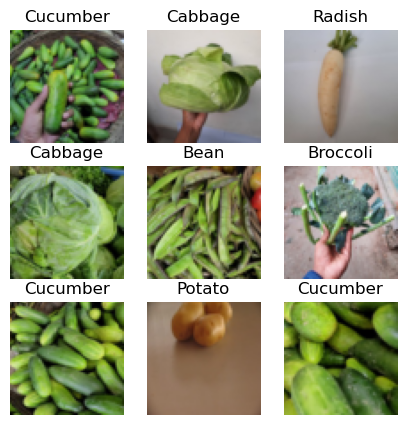

In [50]:
data.show_batch(figsize=(5,5))

**Building model**

Model is created in Pytorch and it is a must. In my model there are 3 Convulution layer, 3 Max Pooling layer and 3 flatten layer. Output has 15 layer because my dataset consists of 15 classes.

In [51]:
model = nn.Sequential(
    nn.Conv2d(in_channels=3,out_channels=4,kernel_size=(3,3)),
    nn.ReLU(),
    nn.MaxPool2d((2,2)),
    nn.Conv2d(in_channels=4,out_channels=8,kernel_size=(3,3)),
    nn.ReLU(),
    nn.MaxPool2d((2,2)),
    nn.Conv2d(in_channels=8,out_channels=16,kernel_size=(3,3)),
    nn.ReLU(),
    nn.MaxPool2d((2,2)),
    nn.Conv2d(in_channels=16,out_channels=16,kernel_size=(3,3)),
    nn.ReLU(),
    nn.MaxPool2d((2,2)),
    
    nn.Flatten(),
    nn.Linear(64,512),
    nn.ReLU(),
    nn.Linear(512,128),
    nn.ReLU(),
    nn.Linear(128,15)
)

In [52]:
model

Sequential(
  (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=64, out_features=512, bias=True)
  (14): ReLU()
  (15): Linear(in_features=512, out_features=128, bias=True)
  (16): ReLU()
  (17): Linear(in_features=128, out_features=15, bias=True)
)

**Creating learn variable**

Learn variable is our fast ai model. It takes dataset, model and some other ai metrics.

In [55]:
learn = Learner(data,model,loss_func=fastai.losses.CrossEntropyLossFlat(),metrics=[accuracy,error_rate])

In [56]:
learn.summary()

Sequential (Input shape: 32 x 3 x 64 x 64)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 4 x 62 x 62    
Conv2d                                    112        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 4 x 31 x 31    
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 8 x 29 x 29    
Conv2d                                    296        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 8 x 14 x 14    
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 16 x 12

**Training our model**

In first training, I trained model with one cycle method. Accuracy increased 0.16 to 0.74 in this block. Then I changed the method. The next method is fine tuning. I trained 10 epoch with fine tuning. The 5 epoch is freeze_epochs.

In [58]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.592487,2.474260,0.163333,0.836667,01:39
1,1.934692,1.979623,0.310000,0.690000,00:43
2,1.586334,1.500245,0.486667,0.513333,00:43
3,1.305366,1.286941,0.565000,0.435000,00:43
4,1.084070,1.097061,0.640333,0.359667,00:44
5,0.951661,1.006261,0.664000,0.336000,00:43
6,0.870998,0.904986,0.704000,0.296000,00:44
7,0.789931,0.824287,0.736000,0.264000,00:44
8,0.723629,0.807771,0.745333,0.254667,00:43
9,0.695167,0.796829,0.749667,0.250333,00:43


In [59]:
learn.fine_tune(10,freeze_epochs = 5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.776453,0.806663,0.743333,0.256667,00:43
1,0.855946,0.817524,0.735667,0.264333,00:43
2,0.849566,0.896266,0.706333,0.293667,00:43
3,0.761388,0.733893,0.750000,0.250000,00:44
4,0.633736,0.574092,0.809333,0.190667,00:43


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.422789,0.491571,0.849000,0.151000,00:43
1,0.433245,0.532589,0.838667,0.161333,00:43
2,0.430798,0.530747,0.820667,0.179333,00:44
3,0.386477,0.460923,0.851667,0.148333,00:43
4,0.350728,0.369707,0.890333,0.109667,00:43
5,0.275319,0.330984,0.897000,0.103000,00:44
6,0.219153,0.310405,0.907333,0.092667,00:43
7,0.171416,0.305773,0.912000,0.088000,00:43
8,0.151843,0.260296,0.925000,0.075000,00:44
9,0.133718,0.254934,0.927667,0.072333,00:46


**Checking our model in test set**

Evaulating model on the test set. Here it predicted all the pictures correctly.

In [60]:
learn.validate()

(#3) [0.25493425130844116,0.9276666641235352,0.07233333587646484]

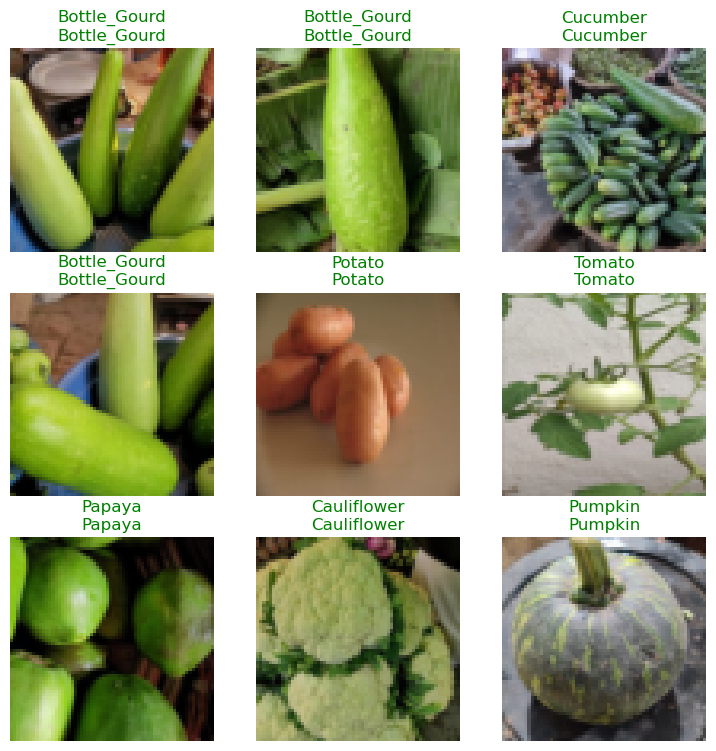

In [61]:
learn.show_results()

Here, I took a picture from web. The model predicted it correctly.

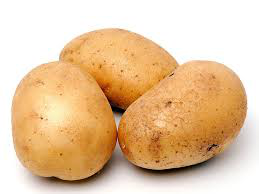

In [66]:
from PIL import Image
img = Image.open(r"C:\Users\Talip Eren Doyan\Desktop\images.jpg")
img

In [67]:
learn.predict(img)

('Potato',
 tensor(11),
 tensor([1.5749e-16, 1.7863e-13, 1.3371e-29, 1.0382e-18, 3.7308e-19, 1.2266e-08,
         3.5997e-11, 2.9727e-06, 1.0629e-10, 9.8177e-21, 6.5448e-20, 9.9999e-01,
         4.9612e-09, 4.6640e-08, 5.1845e-06]))